# Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [6]:
df.iloc[:,:-1].mean()

Area               75557.933333
Perimeter            999.372293
MajorAxisLength      370.564985
MinorAxisLength      240.245914
roundnes               0.875078
dtype: float64

In [8]:
df.iloc[:,:-1]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,roundnes
0,114004,1279.356,451.361256,323.747996,0.875280
1,117034,1265.926,425.923787,351.215109,0.917710
2,126503,1326.959,475.772459,339.381887,0.902809
3,128118,1360.135,504.024964,NaN,0.870274
4,129409,1348.888,484.364424,341.172659,0.893763
...,...,...,...,...,...
145,35476,711.317,266.850828,169.928349,0.881086
146,35506,713.086,262.106215,173.247828,0.877461
147,35561,708.141,259.768348,174.810552,0.891137
148,35570,710.530,263.260383,173.378732,0.885378


In [7]:
df.iloc[:,:-1]- df.iloc[:,:-1].mean()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,roundnes
0,38446.066667,279.983707,80.796271,83.502082,0.000202
1,41476.066667,266.553707,55.358803,110.969195,0.042631
2,50945.066667,327.586707,105.207474,99.135973,0.027730
3,52560.066667,360.762707,133.459980,NaN,-0.004804
4,53851.066667,349.515707,113.799440,100.926745,0.018685
...,...,...,...,...,...
145,-40081.933333,-288.055293,-103.714157,-70.317565,0.006008
146,-40051.933333,-286.286293,-108.458770,-66.998086,0.002383
147,-39996.933333,-291.231293,-110.796636,-65.435362,0.016059
148,-39987.933333,-288.842293,-107.304601,-66.867182,0.010300


In [3]:
df.iloc[:,:-1] = (df.iloc[:,:-1] - df.iloc[:,:-1].mean()) / df.iloc[:,:-1].std()

Area               44232.034170
Perimeter            293.752695
MajorAxisLength      105.115378
MinorAxisLength       75.490630
roundnes               0.034295
dtype: float64

<font size='5'> **Data Description :** </font>The data set consists of 50 samples from each of three categories of Dry beans (Bomay, Cali and Sira)

(in millimeter)
- **Area**: The area of a bean zone
- **Perimeter**: Bean circumference
- **MajorAxisLength**:The distance between the ends of the longest line that can be drawn from a bean
- **MinorAxisLength**The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- **roundnes**:
- **Class**:'BOMBAY', 'CALI', 'SIRA'



# Exploring Data

In [3]:
df.head().style.background_gradient('Blues')


,Area,Perimeter,MajorAxisLength,MinorAxisLength,roundnes,Class
0,114004,1279.356000,451.361256,323.747996,0.875280,BOMBAY
1,117034,1265.926000,425.923787,351.215109,0.917710,BOMBAY
2,126503,1326.959000,475.772459,339.381887,0.902809,BOMBAY
3,128118,1360.135000,504.024964,nan,0.870274,BOMBAY
4,129409,1348.888000,484.364424,341.172659,0.893763,BOMBAY


In [4]:
df.shape

(150, 6)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             150 non-null    int64  
 1   Perimeter        150 non-null    float64
 2   MajorAxisLength  150 non-null    float64
 3   MinorAxisLength  149 non-null    float64
 4   roundnes         150 non-null    float64
 5   Class            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Preprocessing

## Handling Nulls

In [7]:
df[df['MinorAxisLength'].isnull()]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,roundnes,Class
3,128118,1360.135,504.024964,NaN,0.870274,BOMBAY


<AxesSubplot:>

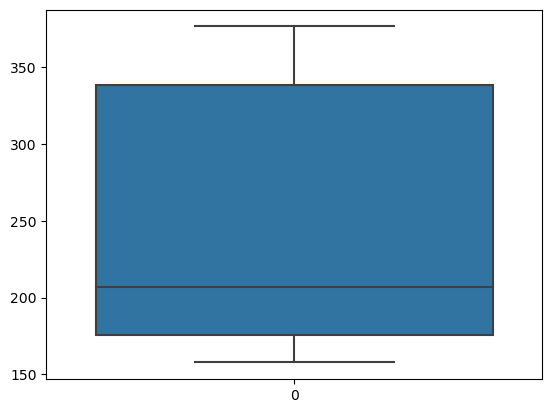

In [8]:
sns.boxplot(data=df['MinorAxisLength'],orient="v")

**No outliers so will fill with the mean**


In [9]:
print("Mean of 'MinorAxisLength':",  df['MinorAxisLength'].mean())

Mean of 'MinorAxisLength': 240.24591389443768


In [10]:
df['MinorAxisLength'].fillna(df['MinorAxisLength'].mean(),inplace=True)

In [11]:
df['MinorAxisLength'].isnull().sum()

0

## Encoding

'Class' is object so need to encode it lets see firt unique values in this column

In [12]:
df.describe(include='O').T

,count,unique,top,freq
Class,150,3,BOMBAY,50


In [13]:
df['Class'].unique()

array(['BOMBAY', 'CALI', 'SIRA'], dtype=object)

In [14]:
mapping = {'BOMBAY': -1, 'CALI': 0, 'SIRA': 1}

In [15]:
df['Class_encoded'] = df['Class'].map(mapping)

In [16]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,roundnes,Class,Class_encoded
0,114004,1279.356,451.361256,323.747996,0.875280,BOMBAY,-1
1,117034,1265.926,425.923787,351.215109,0.917710,BOMBAY,-1
2,126503,1326.959,475.772459,339.381887,0.902809,BOMBAY,-1
3,128118,1360.135,504.024964,240.245914,0.870274,BOMBAY,-1
4,129409,1348.888,484.364424,341.172659,0.893763,BOMBAY,-1
...,...,...,...,...,...,...,...
145,35476,711.317,266.850828,169.928349,0.881086,SIRA,1
146,35506,713.086,262.106215,173.247828,0.877461,SIRA,1
147,35561,708.141,259.768348,174.810552,0.891137,SIRA,1
148,35570,710.530,263.260383,173.378732,0.885378,SIRA,1


In [17]:
# No longer needed cause we have 'Class_encoded'
df.drop(columns=['Class'], inplace=True)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,150.0,75557.933333,44232.034170,31519.000000,35139.250000,56756.500000,132879.500000,144079.000000
Perimeter,150.0,999.372293,293.752695,668.106000,708.690000,914.957000,1369.277750,1463.258000
MajorAxisLength,150.0,370.564985,105.115378,233.804968,264.743366,352.010221,497.101354,540.677823
MinorAxisLength,150.0,240.245914,75.236879,157.802740,175.446040,206.657346,338.142015,376.550241
roundnes,150.0,0.875078,0.034295,0.688618,0.855589,0.880003,0.893303,0.954104
Class_encoded,150.0,0.000000,0.819232,-1.000000,-1.000000,0.000000,1.000000,1.000000


## Checking For Outliers

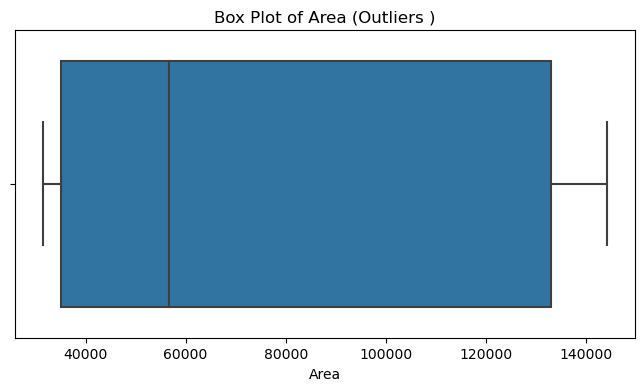

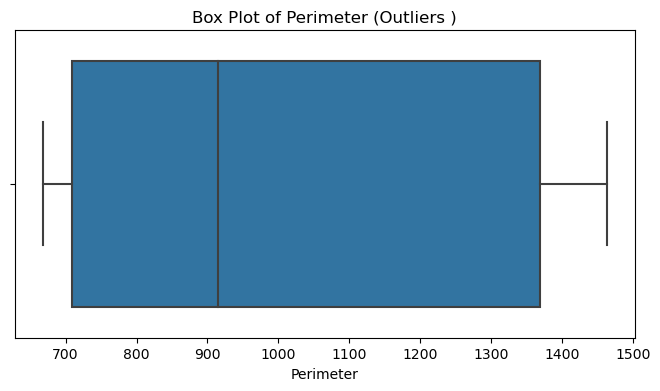

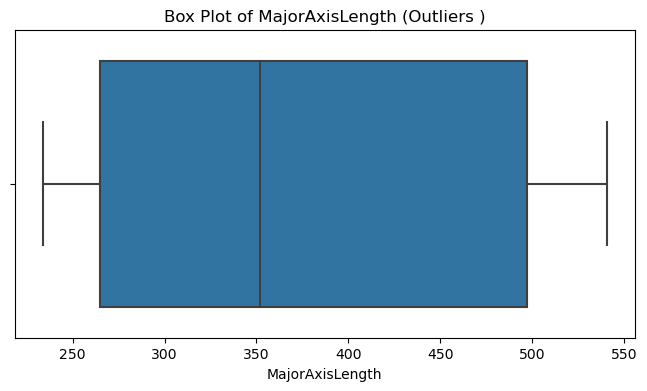

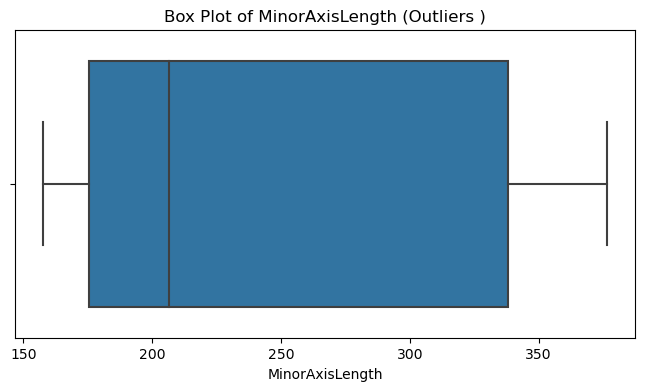

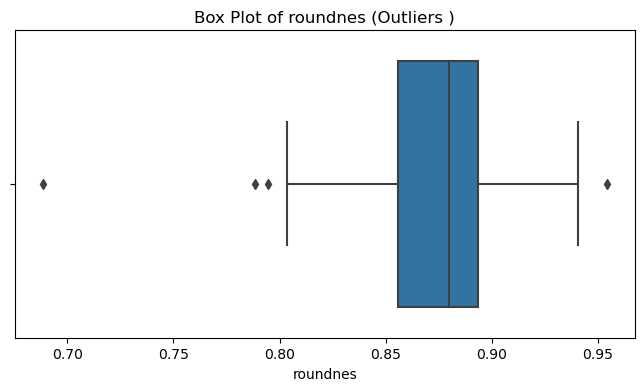

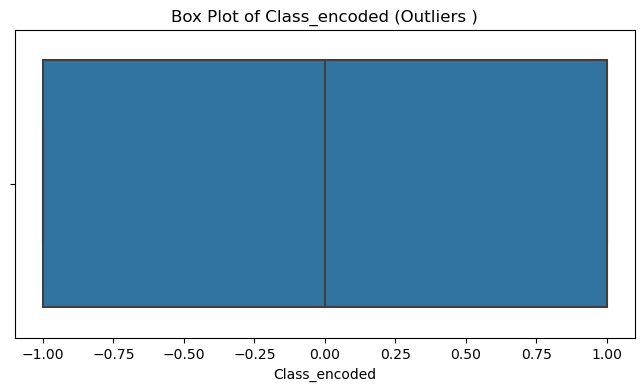

In [19]:
# Create box plots to visualize outliers before handling
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col} (Outliers )')
        plt.show()

Outliers in column roundness

<AxesSubplot:xlabel='roundnes', ylabel='Count'>

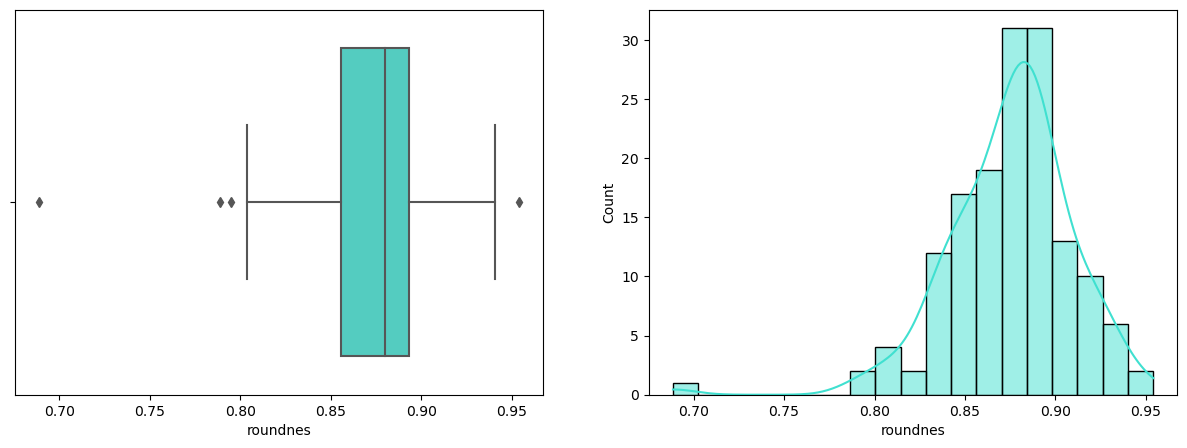

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['roundnes'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['roundnes'], kde=True,color='turquoise')

Outliers are in class -1 and 1 which are BOMBAY and SIRA

## Handling Outliers

In [21]:
def find_range(col):
    Q1, Q3 = col.quantile(0.25), col.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

In [22]:
lower_limit, upper_limit = find_range(df['roundnes'])
df['roundnes'].clip(lower_limit, upper_limit,inplace=True)
print(f"Replaced outliers in roundnes. Lower limit: {lower_limit}, Upper limit: {upper_limit}")

Replaced outliers in roundnes. Lower limit: 0.799016371994332, Upper limit: 0.9498757359232013


<AxesSubplot:xlabel='roundnes', ylabel='Count'>

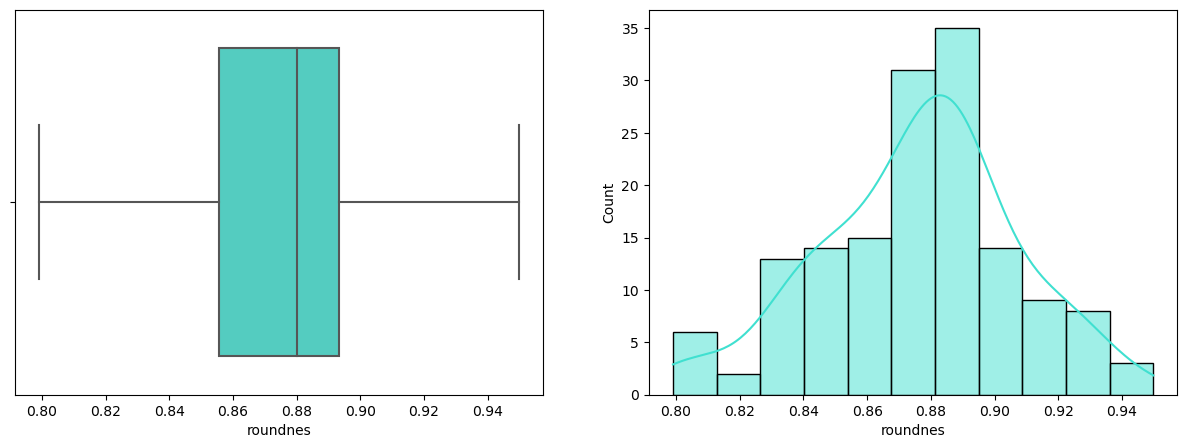

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['roundnes'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['roundnes'], kde=True,color='turquoise')

## Scaling Data

In [24]:
df.iloc[:,:-1] = (df.iloc[:,:-1] - df.iloc[:,:-1].mean()) / df.iloc[:,:-1].std()

In [25]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,roundnes,Class_encoded
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-7.475502e-17,-2.713385e-15,-2.975398e-16,7.209048e-16,-1.073493e-14,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.819232
min,-9.956344e-01,-1.127705e+00,-1.301047e+00,-1.095781e+00,-2.479896e+00,-1.000000
25%,-9.137876e-01,-9.895477e-01,-1.006719e+00,-8.612781e-01,-6.547655e-01,-1.000000
50%,-4.250637e-01,-2.873686e-01,-1.765181e-01,-4.464375e-01,1.328792e-01,0.000000
75%,1.295929e+00,1.259241e+00,1.203786e+00,1.301172e+00,5.619880e-01,1.000000
max,1.549128e+00,1.579171e+00,1.618344e+00,1.811669e+00,2.387118e+00,1.000000


# Visualizations and Analysis

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>],
       [<AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'roundnes'}>,
        <AxesSubplot:title={'center':'Class_encoded'}>]], dtype=object)

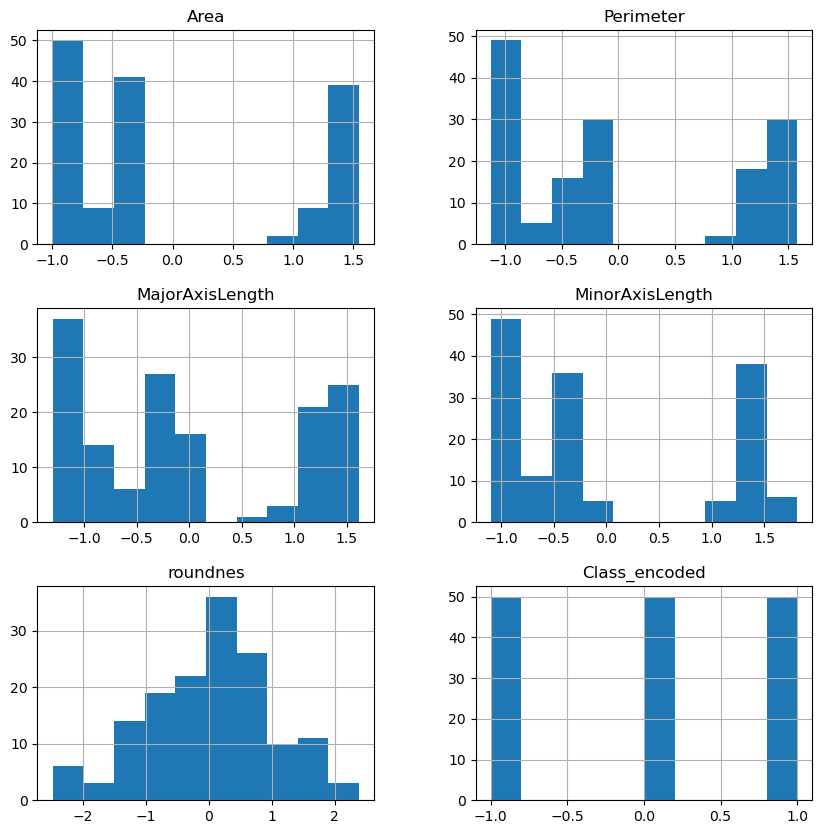

In [26]:
df.hist(figsize=(10,10 ))

Conclusion about histogram with numerical values only
* Most areas less than 4000 mm
* Perimeter most are less than 700



<AxesSubplot:>

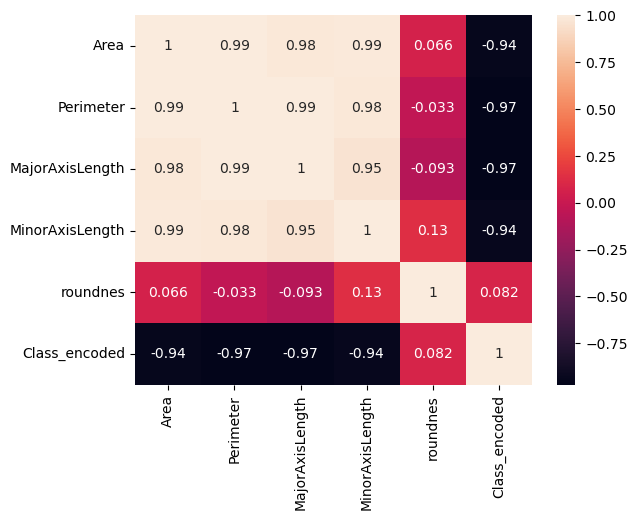

In [27]:
sns.heatmap(df.corr() , annot=True )

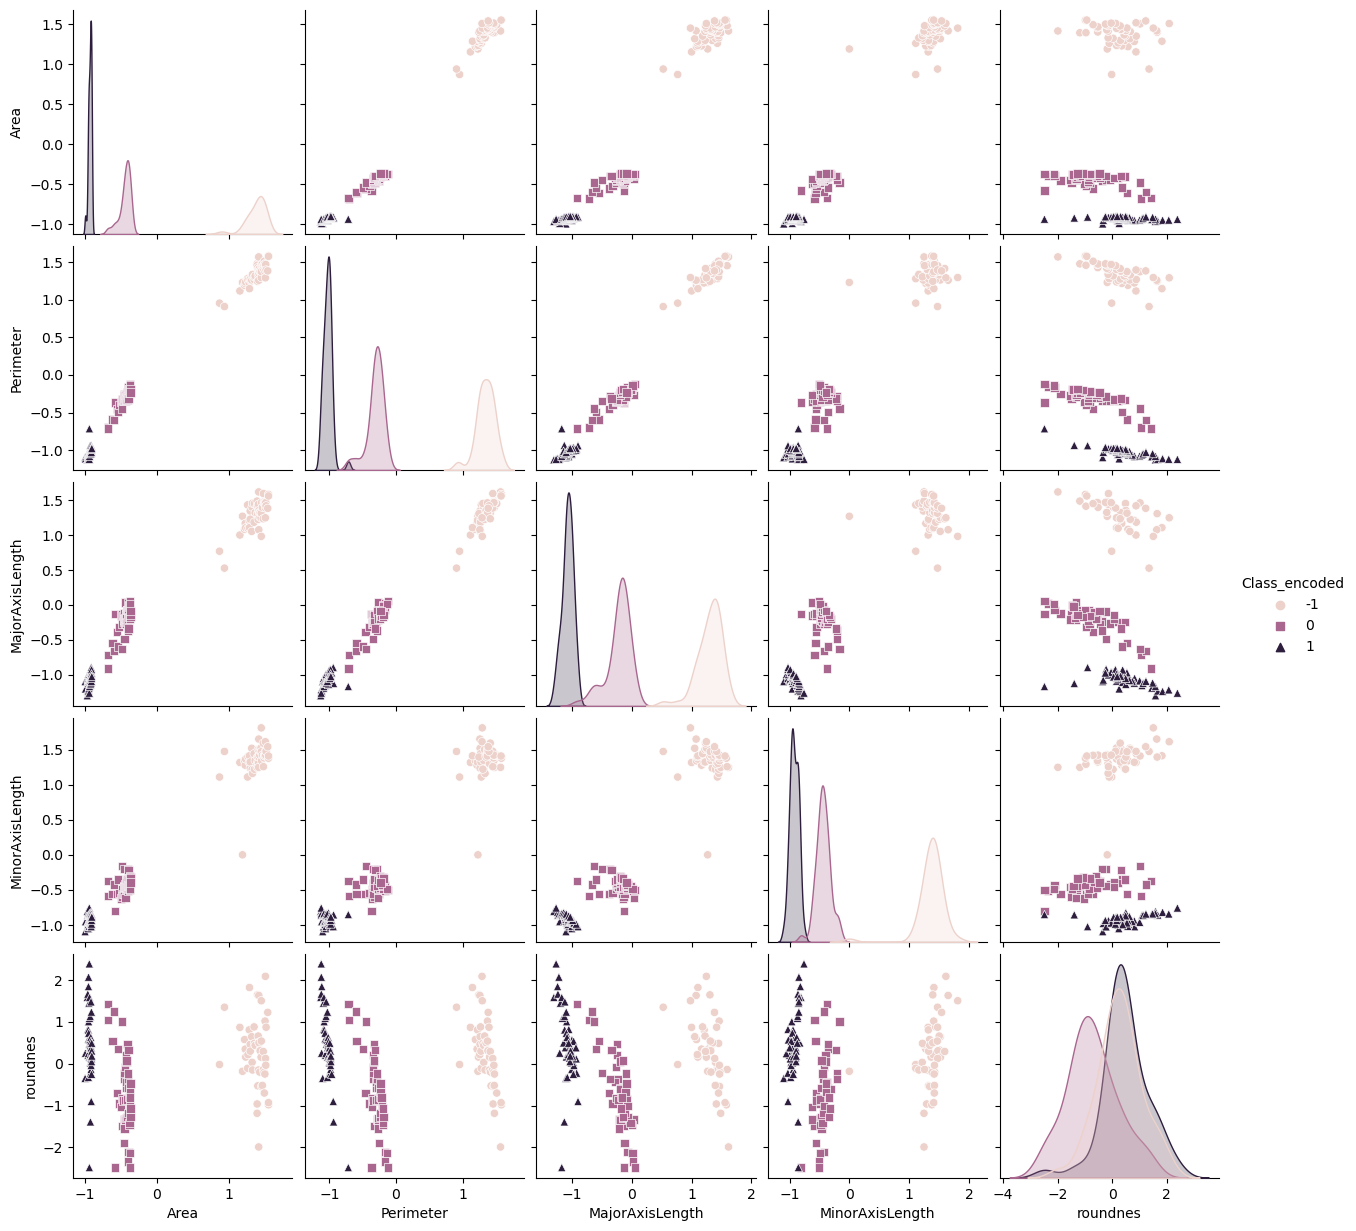

In [28]:
sns.pairplot(df, hue='Class_encoded', markers=['o', 's', '^'])
plt.show()

# Spliting and training the model

In [29]:
df['Class_encoded'].unique()

array([-1,  0,  1], dtype=int64)

In [30]:
X = df.drop(columns=['Class_encoded'])
y = df['Class_encoded']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=41)

In [32]:
y_train.shape

(90,)

In [33]:
unique_values, counts = np.unique(y_train, return_counts=True)

value_counts = dict(zip(unique_values, counts))

print("Count of each value:")
print(value_counts)

Count of each value:
{-1: 30, 0: 30, 1: 30}
